## Gradient Descent and Cost Function

* Lineer regresyonda verilerin olduğu yere bir çizgi çekiliyor. Ama sorun şu ki  birden çok çizgi olabilir potansiyel olarak bu veri noktalarından geçebilir.



*  Burada amaç verilere göre en uygun çizgiyi çizmek. 


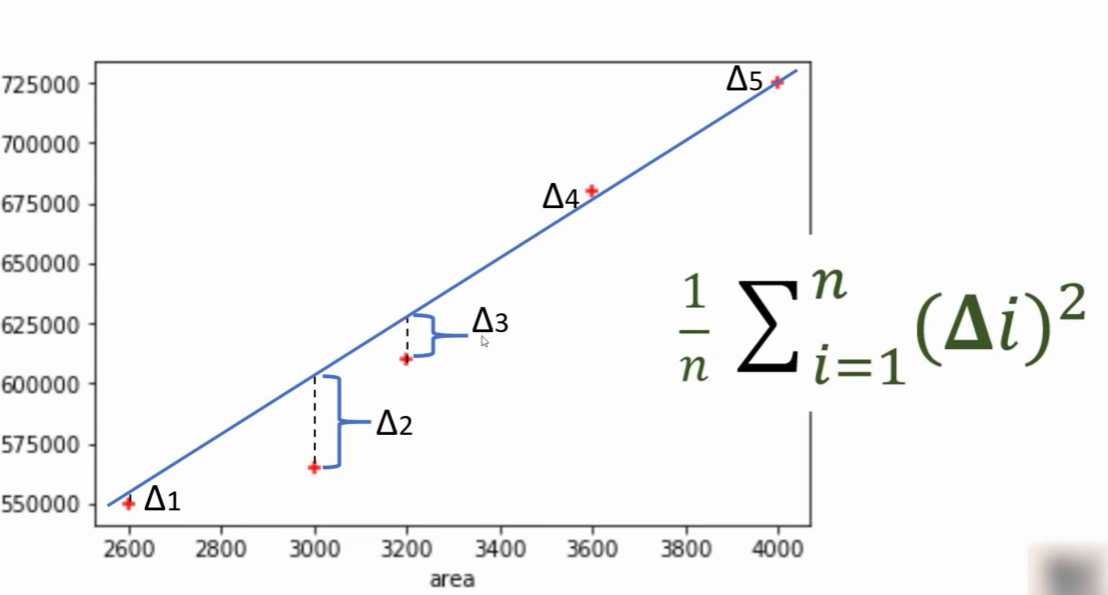 


* çizilen çizgilerin hangisinin en iyi çizgi olacağını bulmak için bu formül kullanılır. Çizilen çizgiden noktalara fark alınarak yukarıdaki fomüle göre hesaplama yapılır.


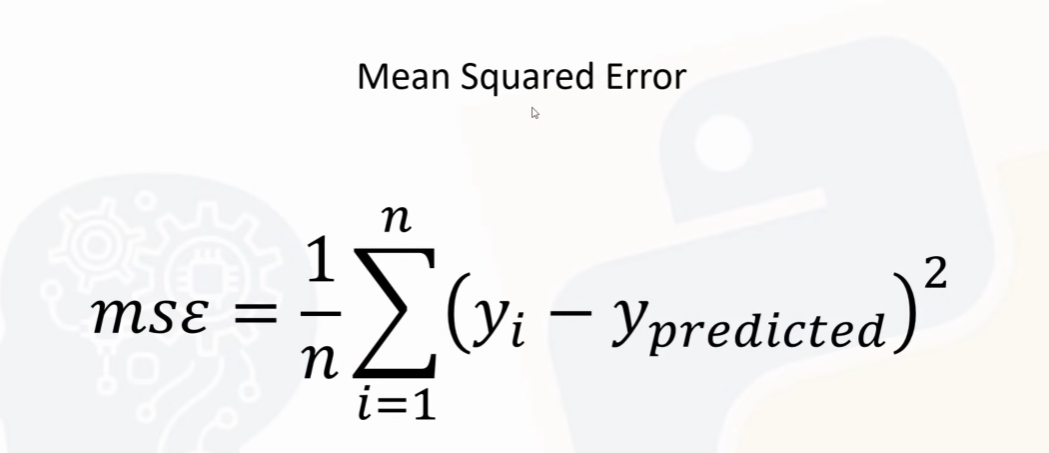


* yi olan çizginin geçtiği nokta ve ypredicted olan verinin bulunduğu noktadır.



* Bir çok cost fonksiyonu vardır ama mean Squared error en yaygın kullanılanıdır.


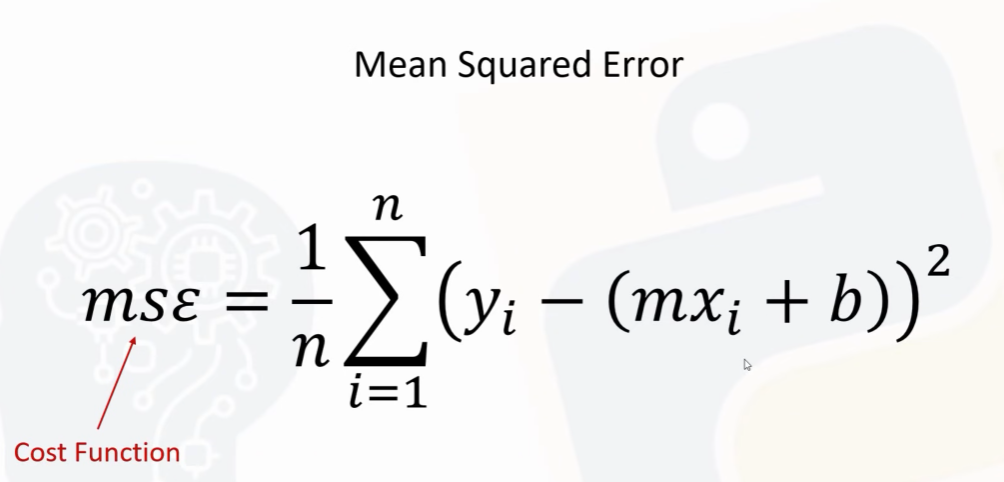



* Linear Regression için cost fonction 


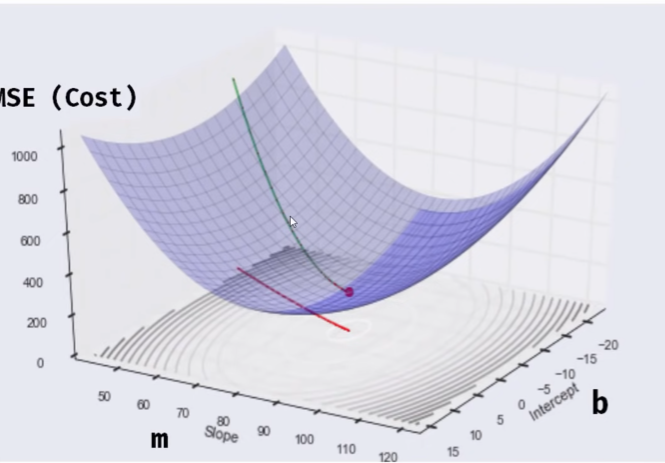


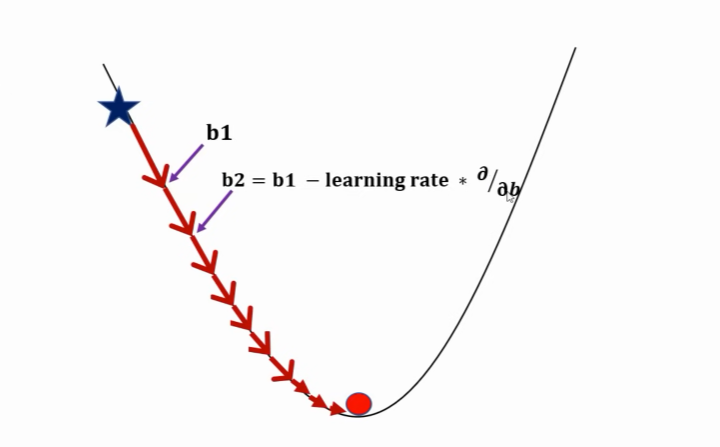



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math
import pandas as pd
from sklearn import linear_model

* Teoriyi gözden geçirmek için yani mevcut değeri için m ve b nin mevcut değerleri olmalı. Daha sonra minimuma ulaşmak için küçük adımlar atılacak.


* ikinci olarak yineleme sayısı tanımlanır. Kaç adım atılacaksa istenilene göre seçilir ardından düzenlenir vs.

In [32]:
%matplotlib inline
def gradient_descent(x,y):
    #başlangıç değerleri
    m_curr= b_curr=0
    
    n= len(x)
    # n dizinin uzunluğudur.
    
    learning_rate= 0.02
    # öğrenme oranı teorideki alfa değeridir. 
    # başlangıçta 0.001 gibi küçük bir değer vererek başlansa da sonradan değişebilir.
    # genel anlamda çok büyük veya çok küçük olmaması istenilendir.
    
    iterations=1000 # kaç adım işlem yapılacağı
    
    # bu adımlarda görselleştirme yapılarak değişim görüntülenebilir.
    plt.scatter( x,y, color="red", marker="x", linewidths=5)
    
    #bu adımları yapacak basit bir döngü tanımlayalım.
    for i in range(iterations):
        #burada yapılacak ilk şey y nin tahmin edilen değerini hesaplamak.
        y_predicted = m_curr*x + b_curr # tahmin edilen y fonksiyonun hesaplamasıdır.
       
        # veriyi görselleştirmek
        plt.plot(x,y_predicted,color='blue')
        
        # maliyeti yazdırmak için maliyet tanımlaması yapıyoruz.
        # maliyet her y değerinin hesaplanan y'den (y_predicted) farkının karelerinin toplamı
        # ve bu toplamın eleman sayısına bölümüdür.
        cost= (1/n)*sum([val**2 for val in (y-y_predicted)])
    
        # diğer adım m ve b nin türevini (derivative) hesaplamak 
        # m türevi- md,  b türevi- bd
        md= -(2/n)*sum(x*(y- y_predicted))
        bd= -(2/n)*sum(y- y_predicted)
        
        # daha sonra mevcut m ve b değerleri değiştirilir.
        # yeni değerlerin formülü;
        # m= m-learning rate * türev m
        # b= b-learning rate * türev b
        m_curr= m_curr - learning_rate*md
        b_curr= b_curr -learning_rate*bd
        
        # görmek için her bir iterasyon sonrasında yadırma işlemi 
        # print("m {}, b {}, iteration {}".format(m_curr, b_curr, i))
        
        # yukarıdaki yazdırma işleminden sonra maliyeti de görmek için maliyet hesabı eklenerek
        #yeniden yazdırma işlemi yapalım.
        print("m {}, b {}, cost {}, iteration {}".format(m_curr, b_curr, cost, i))

* Türev formülleri; 

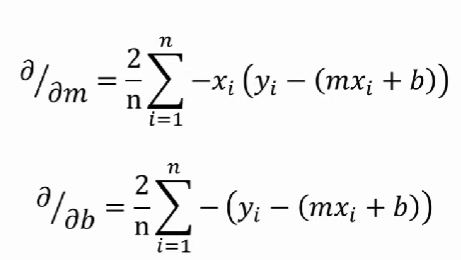



* mevcut m ve b nin güncellenme formülleri;
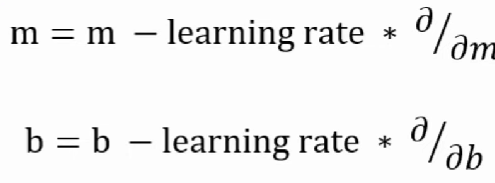



* maliyet formülü;
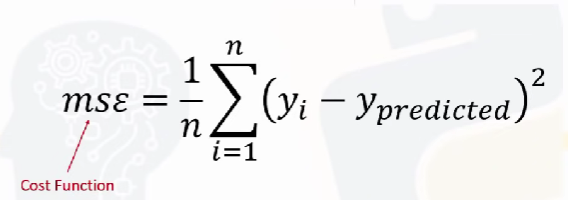

* bütün hesaplamalar sonrasında yazdırılan m, b, cost ve iterasyon adımı sonrasında adımların her birinde maliyetin düştüğü görülebilir. 

* ne zaman durulacağı nasıl anlaşılır??

iterasyon değeri arttırıldiğinda b ve m değerlerinin birbirlerine yaklaştığı görülür.
öğrenme oranı arttırıldığında maliyet değiştiği gözlemlenebilir. 
burada öğrenme oranı üzerinde değişiklik yaparak optimum değere ulaşılabileceği gözlemlenebilir. 



* Optimum değere ulaşıldığında b, m ve cost değerleri hep aynı çıkar. 



* farklı yinelemeler/adımlar arasındaki maliyeti karşılaştırarak eğriliğin özelliği görülebilir ve küresel minimuma ulaşıldığında maliyet neredeyse aynı kaldığından karşılaştırma yaparak maiyet fazla düşmediğinde durdurulabilir. 

m 1.24, b 0.36, cost 89.0, iteration 0
m 1.8912, b 0.5568, cost 25.3616, iteration 1
m 2.232256, b 0.667584, cost 7.694359040000001, iteration 2
m 2.40995328, b 0.73300992, cost 2.7832300789760005, iteration 3
m 2.5016126464, b 0.7744951296, cost 1.4117625182879754, iteration 4
m 2.547963666432, b 0.803321806848, cost 1.0225913197820489, iteration 5
m 2.57046103638016, b 0.82543329460224, cost 0.9061020411503913, iteration 6
m 2.580406185020621, b 0.8439606384525312, cost 0.8653906318976792, iteration 7
m 2.583752186997244, b 0.8605534707119554, cost 0.8458189807137511, iteration 8
m 2.583634808233022, b 0.8760810694438079, cost 0.8322246831340234, iteration 9
m 2.581705764277235, b 0.891001649678093, cost 0.8203990003422286, iteration 10
m 2.5788350300338805, b 0.9055568919777011, cost 0.8091726163869117, iteration 11
m 2.5754807897816487, b 0.9198744126945274, cost 0.798219608661616, iteration 12
m 2.57188431275438, b 0.9340217414129485, cost 0.7874480974823337, iteration 13
m 2.5681

m 2.0164614545058557, b 2.940568926042631, cost 0.0006516787673089258, iteration 536
m 2.0163501433981637, b 2.940970794460223, cost 0.0006428953595579223, iteration 537
m 2.0162395849677446, b 2.9413699454740345, cost 0.0006342303356727239, iteration 538
m 2.016129774125053, b 2.941766397458944, cost 0.0006256821000607561, iteration 539
m 2.0160207058149564, b 2.9421601686655796, cost 0.000617249078635131, iteration 540
m 2.015912375016506, b 2.9425512772211615, cost 0.0006089297185246581, iteration 541
m 2.015804776742704, b 2.9429397411303344, cost 0.0006007224877879873, iteration 542
m 2.015697906040274, b 2.9433255782759966, cost 0.0005926258751313963, iteration 543
m 2.015591757989434, b 2.943708806420124, cost 0.0005846383896305382, iteration 544
m 2.0154863277036683, b 2.9440894432045868, cost 0.0005767585604560989, iteration 545
m 2.015381610329504, b 2.944467506151963, cost 0.000568984936602594, iteration 546
m 2.0152776010462867, b 2.944843012666344, cost 0.00056131608662152

m 2.0016728249127715, b 2.993960571280425, cost 6.729737653348348e-06, iteration 873
m 2.001661513397501, b 2.9940014094396754, cost 6.639033409429171e-06, iteration 874
m 2.0016502783698393, b 2.994041971454388, cost 6.549551688628761e-06, iteration 875
m 2.0016391193125833, b 2.994082259191832, cost 6.461276013629713e-06, iteration 876
m 2.001628035712027, b 2.994122274506649, cost 6.374190129193922e-06, iteration 877
m 2.001617027057937, b 2.9941620192409397, cost 6.288277999175921e-06, iteration 878
m 2.001606092843532, b 2.99420149522435, cost 6.20352380356719e-06, iteration 879
m 2.0015952325654562, b 2.994240704274152, cost 6.1199119355835424e-06, iteration 880
m 2.0015844457237573, b 2.994279648195331, cost 6.037426998790107e-06, iteration 881
m 2.0015737318218645, b 2.994318328780667, cost 5.956053804269762e-06, iteration 882
m 2.001563090366564, b 2.9943567478108166, cost 5.875777367818134e-06, iteration 883
m 2.001552520867978, b 2.9943949070543963, cost 5.796582907195752e-0

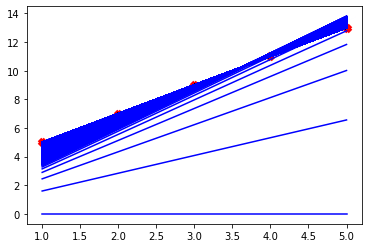

In [33]:
x= np.array([1,2,3,4,5])
y= np.array([5,7,9,11,13])
gradient_descent(x,y)

# Alıştırma Örneği

* matematik bilgisayar dersleri test verileri veriliyor ve öğrencilerin isimleri bulunuyor. 


* Amaç matematik ve bilgisayar puanı arasındaki ilişkiyi bulmak.


* verilen verilerde özetle matematik x değeri, bilgisayar bilimi ise y puanı


* gradient kullanarak m ve b değerleri bulunacak.


* yapılması gereken her yineleme arasındaki maliyet belirli bir eşikte olduğunda durmak. Eşiği karşılaştırmak için, *  math.isclose(a,b,*,rel_tol=1e-09,abs_tol=0.0) yani math kütüphanesinin yakın fonksiyonu kullanılacak. 
rel_tol: tolerans 1e-20 kullanılacak ve bu aralıkta durulacak. m ve b yi bulmak için kaç iterasyon adımı gerektiği tespit edilecek. 

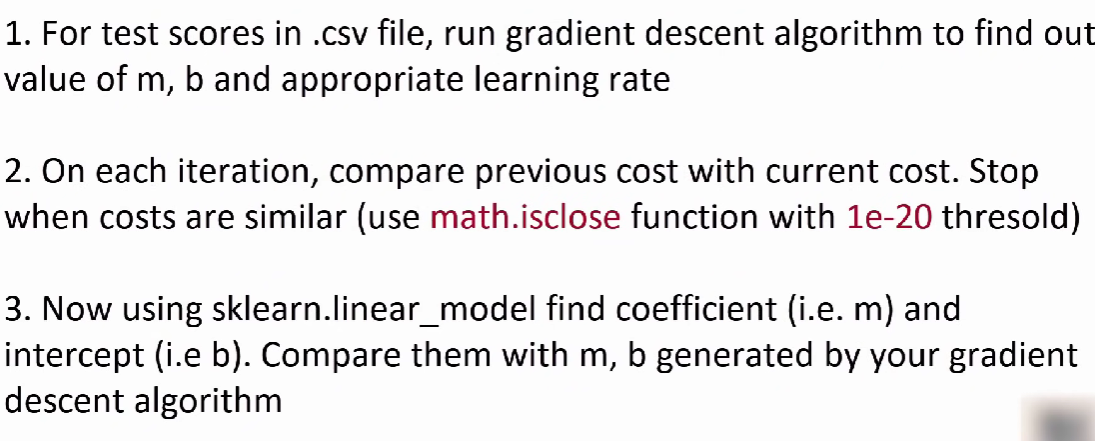


In [2]:
def predict_using_sklean():
    df2= pd.read_csv("test_scores_calisma.csv")
    reg= linear_model.LinearRegression()
    reg.fit(df2[["math"]],df2.cs)
    return reg.coef_, reg.intercept_

In [2]:
def gradient_descent(x,y):
    m_curr = 0
    b_curr = 0
    iterations = 1000000
    n = len(x)
    learning_rate = 0.002

    cost_previous = 0

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n)*sum([value**2 for value in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        if math.isclose(cost, cost_previous, rel_tol=1e-11):
            break
        cost_previous = cost
        print ("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))

    return m_curr, b_curr

In [3]:
if __name__ == "__main__":
    df = pd.read_csv("test_scores_calisma.csv")
    x = np.array(df.math)
    y = np.array(df.cs)

    m, b = gradient_descent(x,y)
    print("Using gradient descent function: Coef {} Intercept {}".format(m, b))

m 19.783600000000003, b 0.2796, cost 5199.1, iteration 0
m -335.1297587200002, b -4.728096320000001, cost 1663047.8675860171, iteration 1
m 6031.9342997386275, b 85.11708759526404, cost 535217407.45495206, iteration 2
m -108191.7332859175, b -1526.6766256452784, cost 172251878290.197, iteration 3
m 1940954.6398105891, b 27388.54081485446, cost 55436745729521.01, iteration 4
m -34820260.85414845, b -491343.8135057944, cost 1.7841505173406942e+16, iteration 5
m 624667505.5305753, b 8814595.541576693, cost 5.742027290093572e+18, iteration 6
m -11206391619.34151, b -158131820.03875938, cost 1.8479874360221043e+21, iteration 7
m 201040092926.6073, b 2836848548.2090473, cost 5.947477068921944e+23, iteration 8
m -3606613112643.927, b -50892411675.69367, cost 1.914108440125197e+26, iteration 9
m 64701811240801.0, b 912998181669.7458, cost 6.1602778423534605e+28, iteration 10
m -1160735639529129.0, b -16378977774598.684, cost 1.9825952542432165e+31, iteration 11
m 2.082333089345585e+16, b 29383

C:\Users\ispir\AppData\Local\Temp/ipykernel_14932/3645597274.py:12: RuntimeWarning: overflow encountered in double_scalars
  cost = (1/n)*sum([value**2 for value in (y-y_predicted)])


In [25]:
m_sklearn, b_sklearn = predict_using_sklean()
print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))

Using sklearn: Coef [1.01773624] Intercept 1.9152193111569318
